In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.keras.backend.set_floatx('float64')
from assigment_utils import *
tf.autograph.set_verbosity(0)

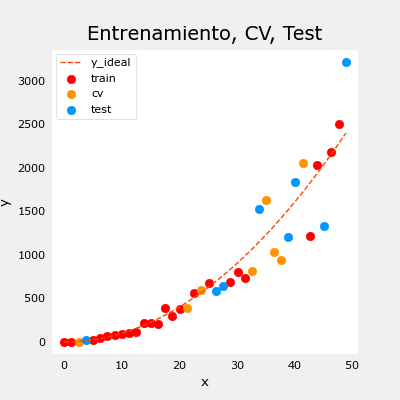

In [2]:
# Genera datos aleatorios
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
# Dividir los datos 60% entrenamiento, 20% Validación y 20% test 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
# Generar los gráficos
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Entrenamiento, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

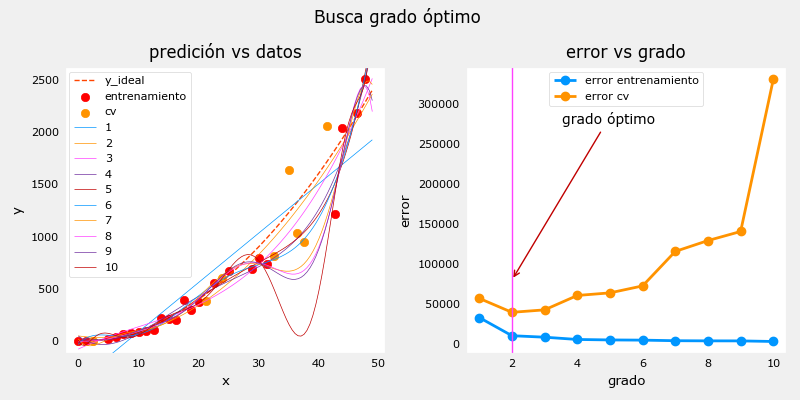

In [3]:
# Cálculo errores y búsqueda grado óptimo ecuación lineal 
max_degree = 10
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  
for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
optimal_degree = np.argmin(err_cv)+1
# graficos
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

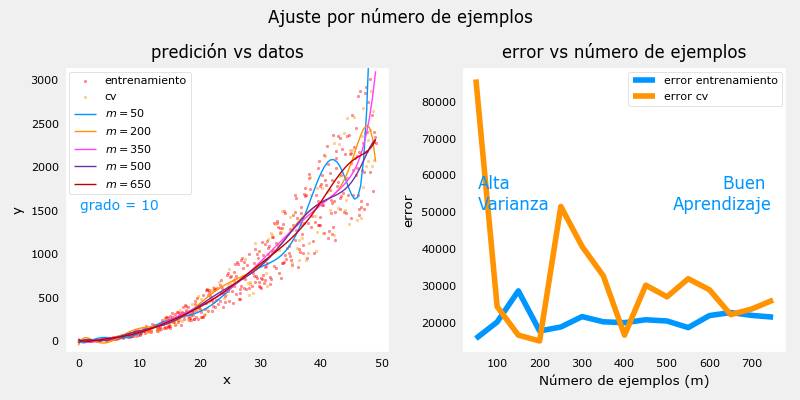

In [4]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

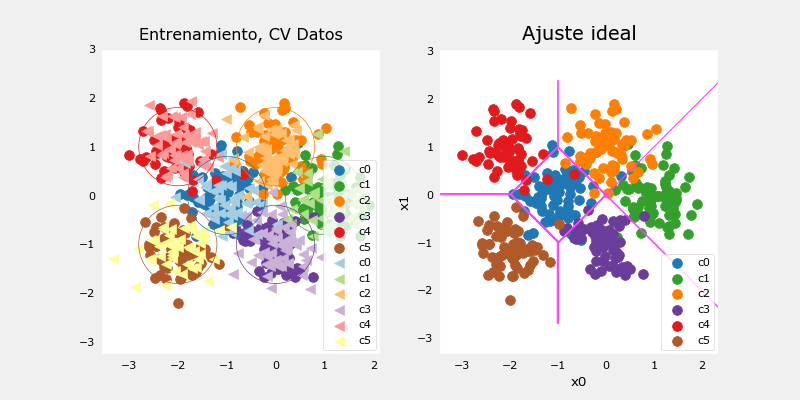

In [5]:
# Genera 800 datos y divide los datos, 50% entrenamiento, 40% validación y 10% test 
X, y, centers, classes, std = gen_blobs()
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
# grafía los datos
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Epoch 1/1000
13/13 [==============================] - 2s 8ms/step - loss: 1.1200
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4025
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3138
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2715
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2775
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.3007
Epoch 7/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2551
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.2291
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2277
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2054
Epoch 11/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.2180
Epoch 12/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2069
Epoch 13/1000
13/13 [==

13/13 [==============================] - 0s 5ms/step - loss: 0.1543
Epoch 101/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1551
Epoch 102/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1535
Epoch 103/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1761
Epoch 104/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1594
Epoch 105/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1493
Epoch 106/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1432
Epoch 107/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1518
Epoch 108/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1407
Epoch 109/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1450
Epoch 110/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1488
Epoch 111/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1553
Epoch 112/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1159
Epoch 199/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1126
Epoch 200/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1146
Epoch 201/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0998
Epoch 202/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0975
Epoch 203/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0942
Epoch 204/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1009
Epoch 205/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1002
Epoch 206/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1097
Epoch 207/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1250
Epoch 208/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1179
Epoch 209/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1261
Epoch 210/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1108
Epoch 297/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1023
Epoch 298/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0841
Epoch 299/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0774
Epoch 300/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0735
Epoch 301/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0849
Epoch 302/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0823
Epoch 303/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1142
Epoch 304/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0831
Epoch 305/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0869
Epoch 306/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0678
Epoch 307/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0816
Epoch 308/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0581
Epoch 395/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0499
Epoch 396/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0566
Epoch 397/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0549
Epoch 398/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0639
Epoch 399/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 400/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0718
Epoch 401/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1325
Epoch 402/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1393
Epoch 403/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0908
Epoch 404/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0609
Epoch 405/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0566
Epoch 406/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0368
Epoch 493/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 494/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0411
Epoch 495/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0379
Epoch 496/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0364
Epoch 497/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0369
Epoch 498/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 499/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0363
Epoch 500/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0358
Epoch 501/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0400
Epoch 502/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0453
Epoch 503/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0556
Epoch 504/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 591/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0385
Epoch 592/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0491
Epoch 593/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 594/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0525
Epoch 595/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0827
Epoch 596/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0795
Epoch 597/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 598/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 599/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0889
Epoch 600/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0649
Epoch 601/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0704
Epoch 602/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2004
Epoch 689/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1469
Epoch 690/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1611
Epoch 691/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0988
Epoch 692/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0569
Epoch 693/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 694/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 695/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0640
Epoch 696/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1202
Epoch 697/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0874
Epoch 698/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0597
Epoch 699/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0794
Epoch 700/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.0347
Epoch 787/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 788/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0294
Epoch 789/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0282
Epoch 790/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0352
Epoch 791/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0432
Epoch 792/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0400
Epoch 793/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0378
Epoch 794/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0366
Epoch 795/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0315
Epoch 796/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0324
Epoch 797/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0321
Epoch 798/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0353
Epoch 885/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0318
Epoch 886/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0289
Epoch 887/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 888/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0286
Epoch 889/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 890/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0298
Epoch 891/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 892/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0283
Epoch 893/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0281
Epoch 894/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0289
Epoch 895/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 896/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.0549
Epoch 983/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0597
Epoch 984/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 985/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0574
Epoch 986/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 987/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 988/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0399
Epoch 989/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0331
Epoch 990/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 991/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0363
Epoch 992/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0310
Epoch 993/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.0323
Epoch 994/1000
13/1

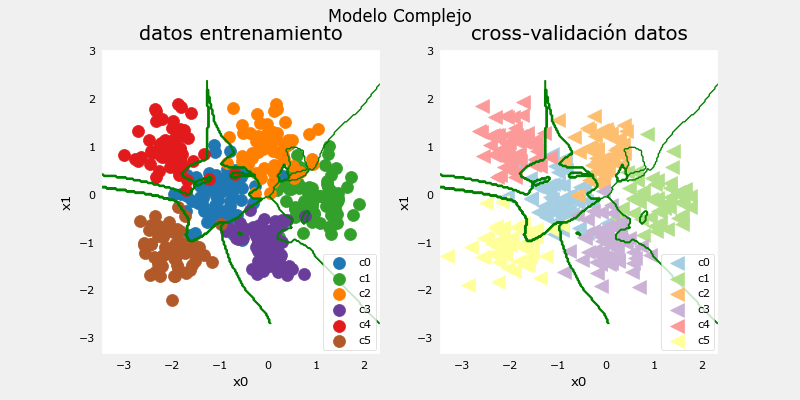

In [6]:
# Modelo Complejo 3 capas, de 120 relu,40 relu 6 lineal
# Optimado ratio aprendizaje 0,01 y 1000 iteraciones
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(units=120, activation='relu'),  
        Dense(units=40, activation='relu'),   
        Dense(units=6, activation='linear')   
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01) 
)
model.fit(
    X_train, y_train,
    epochs=1000
)
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Modelo Complejo")

In [7]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"Cálculo error, Entrenamiento, Modelo Complejo: {training_cerr_complex:0.3f}")
print(f"Cálculo error, Validación, Modelo Complejo: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 3ms/step
Cálculo error, Entrenamiento, Modelo Complejo: 0.010
Cálculo error, Validación, Modelo Complejo: 0.103


In [8]:
# Modelo Complejo 3 capas, de 120 relu,40 relu 6 lineal
# Optimado ratio aprendizaje 0,01 y 1000 iteraciones
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(units=6, activation='relu'),   
        Dense(units=6, activation='linear')   
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01) 
)
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
model_s.fit(
    X_train,y_train,
    epochs=1000
)
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)

Epoch 1/1000
13/13 [==============================] - 1s 8ms/step - loss: 1.4858
Epoch 2/1000
13/13 [==============================] - 0s 9ms/step - loss: 1.2765
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 1.0847
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.9165
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.7847
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6688
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5755
Epoch 8/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4941
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4351
Epoch 10/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3942
Epoch 11/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3654
Epoch 12/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3449
Epoch 13/1000
13/13 [====

Epoch 101/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1901
Epoch 102/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1900
Epoch 103/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1922
Epoch 104/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1882
Epoch 105/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1867
Epoch 106/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1870
Epoch 107/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1859
Epoch 108/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1859
Epoch 109/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1876
Epoch 110/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1876
Epoch 111/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1854
Epoch 112/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1873
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.1827
Epoch 200/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1799
Epoch 201/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1800
Epoch 202/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1784
Epoch 203/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1798
Epoch 204/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1816
Epoch 205/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1787
Epoch 206/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1817
Epoch 207/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1786
Epoch 208/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1841
Epoch 209/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1793
Epoch 210/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1804
Epoch 211/1000
13/1

13/13 [==============================] - 0s 8ms/step - loss: 0.1818
Epoch 298/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1810
Epoch 299/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1763
Epoch 300/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1798
Epoch 301/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1784
Epoch 302/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1822
Epoch 303/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1765
Epoch 304/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1849
Epoch 305/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.1774
Epoch 306/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1780
Epoch 307/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.1776
Epoch 308/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1788
Epoch 309/1000
13/

13/13 [==============================] - 0s 3ms/step - loss: 0.1755
Epoch 396/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1795
Epoch 397/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1797
Epoch 398/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1775
Epoch 399/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1764
Epoch 400/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1785
Epoch 401/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1776
Epoch 402/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1767
Epoch 403/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1756
Epoch 404/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1767
Epoch 405/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1747
Epoch 406/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1758
Epoch 407/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1788
Epoch 494/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1761
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1761
Epoch 496/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1787
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1741
Epoch 498/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1744
Epoch 499/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1752
Epoch 500/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1750
Epoch 501/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1790
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1769
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1771
Epoch 504/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1752
Epoch 505/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1740
Epoch 592/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1724
Epoch 593/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1725
Epoch 594/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1714
Epoch 595/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1729
Epoch 596/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1707
Epoch 597/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1721
Epoch 598/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1704
Epoch 599/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1701
Epoch 600/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1718
Epoch 601/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1701
Epoch 602/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1721
Epoch 603/1000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1690
Epoch 690/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1692
Epoch 691/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1690
Epoch 692/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1698
Epoch 693/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1697
Epoch 694/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.1693
Epoch 695/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1680
Epoch 696/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1689
Epoch 697/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1699
Epoch 698/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1692
Epoch 699/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1688
Epoch 700/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1705
Epoch 701/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1709
Epoch 788/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1674
Epoch 789/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1690
Epoch 790/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1727
Epoch 791/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1670
Epoch 792/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1683
Epoch 793/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1714
Epoch 794/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1713
Epoch 795/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1678
Epoch 796/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1707
Epoch 797/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1691
Epoch 798/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1709
Epoch 799/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1675
Epoch 886/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1673
Epoch 887/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1718
Epoch 888/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1676
Epoch 889/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1676
Epoch 890/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1696
Epoch 891/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1675
Epoch 892/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1679
Epoch 893/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.1673
Epoch 894/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1698
Epoch 895/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1683
Epoch 896/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1691
Epoch 897/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1685
Epoch 984/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1679
Epoch 985/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1661
Epoch 986/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1693
Epoch 987/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1665
Epoch 988/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1695
Epoch 989/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1693
Epoch 990/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1672
Epoch 991/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1660
Epoch 992/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1679
Epoch 993/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1677
Epoch 994/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.1673
Epoch 995/1000
13/1

1082/1082 [==============================] - 2s 2ms/step


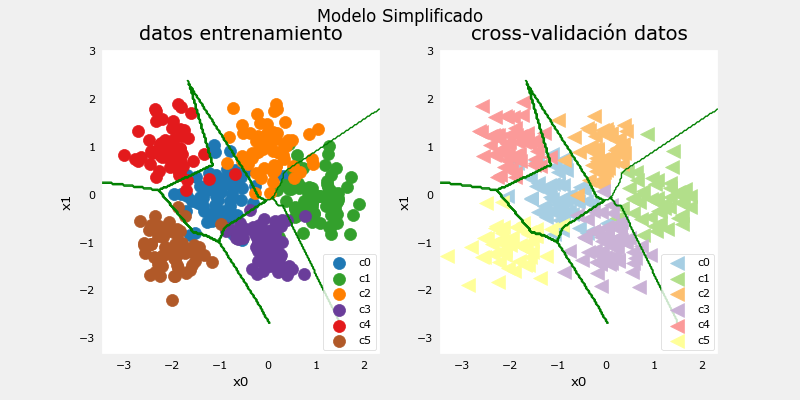

In [9]:
#grafico
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Modelo Simplificado")

In [10]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 4ms/step
categorization error, training, simple model, 0.068, complex model: 0.010
categorization error, cv,       simple model, 0.069, complex model: 0.103


Epoch 1/1000
13/13 [==============================] - 2s 8ms/step - loss: 4.3650
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 1.5750
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 1.2383
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.0226
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.9431
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.9223
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.9052
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.8552
Epoch 9/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.7899
Epoch 10/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.7517
Epoch 11/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.7419
Epoch 12/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.7412
Epoch 13/1000
13/13 [===

13/13 [==============================] - 0s 5ms/step - loss: 0.4818
Epoch 101/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4740
Epoch 102/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4609
Epoch 103/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4630
Epoch 104/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4545
Epoch 105/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5003
Epoch 106/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4575
Epoch 107/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4576
Epoch 108/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4682
Epoch 109/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4566
Epoch 110/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4511
Epoch 111/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4542
Epoch 112/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3969
Epoch 199/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4076
Epoch 200/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4044
Epoch 201/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4308
Epoch 202/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3985
Epoch 203/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4024
Epoch 204/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4103
Epoch 205/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4638
Epoch 206/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4334
Epoch 207/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4141
Epoch 208/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4246
Epoch 209/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4391
Epoch 210/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.3834
Epoch 297/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3912
Epoch 298/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3965
Epoch 299/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3956
Epoch 300/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4267
Epoch 301/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3935
Epoch 302/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3908
Epoch 303/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3926
Epoch 304/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3806
Epoch 305/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3780
Epoch 306/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3894
Epoch 307/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3922
Epoch 308/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3663
Epoch 395/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3954
Epoch 396/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3854
Epoch 397/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3944
Epoch 398/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3838
Epoch 399/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3827
Epoch 400/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3772
Epoch 401/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3589
Epoch 402/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3629
Epoch 403/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3632
Epoch 404/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3627
Epoch 405/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3550
Epoch 406/1000
13/1

13/13 [==============================] - 0s 8ms/step - loss: 0.3762
Epoch 493/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3555
Epoch 494/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3541
Epoch 495/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3536
Epoch 496/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3707
Epoch 497/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4059
Epoch 498/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3552
Epoch 499/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3430
Epoch 500/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3619
Epoch 501/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3528
Epoch 502/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3587
Epoch 503/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3878
Epoch 504/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3426
Epoch 591/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3502
Epoch 592/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3451
Epoch 593/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3451
Epoch 594/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3443
Epoch 595/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4248
Epoch 596/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3961
Epoch 597/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3549
Epoch 598/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3426
Epoch 599/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3393
Epoch 600/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3508
Epoch 601/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3365
Epoch 602/1000
13/1

13/13 [==============================] - 0s 7ms/step - loss: 0.3383
Epoch 689/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4037
Epoch 690/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3851
Epoch 691/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3497
Epoch 692/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3531
Epoch 693/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3381
Epoch 694/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3389
Epoch 695/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3359
Epoch 696/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3356
Epoch 697/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3324
Epoch 698/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3507
Epoch 699/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3432
Epoch 700/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3397
Epoch 787/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3488
Epoch 788/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3524
Epoch 789/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3395
Epoch 790/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3437
Epoch 791/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3696
Epoch 792/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.3858
Epoch 793/1000
13/13 [==============================] - 0s 19ms/step - loss: 0.3575
Epoch 794/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3454
Epoch 795/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4724
Epoch 796/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3792
Epoch 797/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3552
Epoch 798/1000
13/

13/13 [==============================] - 0s 5ms/step - loss: 0.3633
Epoch 885/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3514
Epoch 886/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3477
Epoch 887/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3358
Epoch 888/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3364
Epoch 889/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3343
Epoch 890/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3664
Epoch 891/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3316
Epoch 892/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3304
Epoch 893/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3367
Epoch 894/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3421
Epoch 895/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.3908
Epoch 896/1000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3273
Epoch 983/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3201
Epoch 984/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3378
Epoch 985/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3491
Epoch 986/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3238
Epoch 987/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3256
Epoch 988/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3196
Epoch 989/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3311
Epoch 990/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3348
Epoch 991/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3517
Epoch 992/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3560
Epoch 993/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3220
Epoch 994/1000
13/1

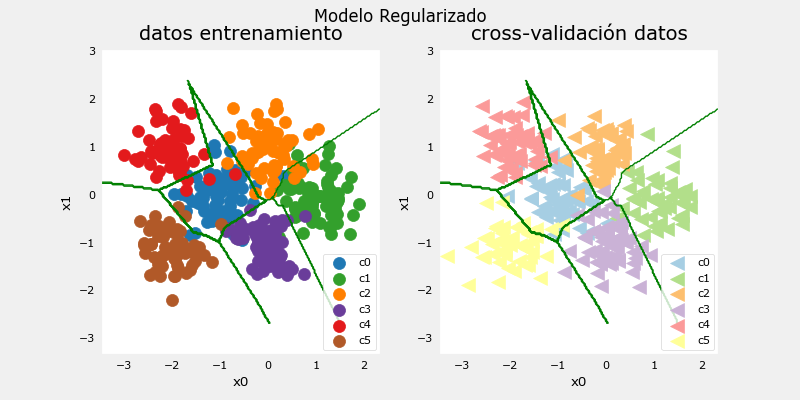

In [11]:
tf.random.set_seed(1234)
model_r = Sequential(
    [
       Dense(units=120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),  # Dense layer with 120 units, relu activation, and L2 regularization
        Dense(units=40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),   # Dense layer with 40 units, relu activation, and L2 regularization
        Dense(units=6, activation='linear')  # Dense layer with 6 units and linear activation
       
    ], name="Regularized"
)

model_r.compile(
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # SparseCategoricalCrossentropy loss
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)  # Adam optimizer with learning rate 0.01
   
)

model_r.fit(
    X_train, y_train,
    epochs=1000
)
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
#grafico
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Modelo Regularizado")
    #make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)

1082/1082 [==============================] - 2s 2ms/step


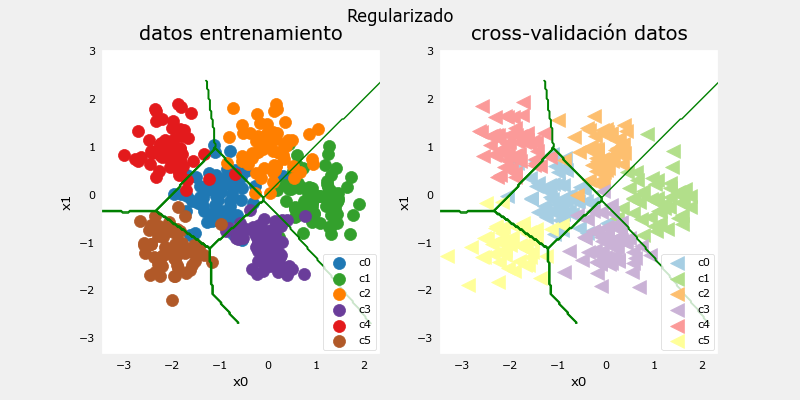

In [12]:
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularizado")

In [13]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"Error, Entrenamiento Modelo, regularizado: {training_cerr_reg:0.3f}, Simple, {training_cerr_simple:0.3f}, Complejo: {training_cerr_complex:0.3f}" )
print(f"Error, CV Modelo, regularizado: {cv_cerr_reg:0.3f}, Simple, {cv_cerr_simple:0.3f}, Complejo: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 6ms/step
Error, Entrenamiento Modelo, regularizado: 0.077, Simple, 0.068, Complejo: 0.010
Error, CV Modelo, regularizado: 0.091, Simple, 0.069, Complejo: 0.103


In [14]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=2000
    )
    print(f"Lambda final = {lambda_}")

Epoch 1/2000
13/13 [==============================] - 2s 5ms/step - loss: 1.1653
Epoch 2/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4203
Epoch 3/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3075
Epoch 4/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2634
Epoch 5/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2646
Epoch 6/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2854
Epoch 7/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2452
Epoch 8/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.2224
Epoch 9/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2250
Epoch 10/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1965
Epoch 11/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2147
Epoch 12/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2058
Epoch 13/2000
13/13 [====

13/13 [==============================] - 0s 7ms/step - loss: 0.1752
Epoch 101/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.1849
Epoch 102/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1685
Epoch 103/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1878
Epoch 104/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1606
Epoch 105/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1510
Epoch 106/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1464
Epoch 107/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1674
Epoch 108/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1487
Epoch 109/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1518
Epoch 110/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1468
Epoch 111/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1576
Epoch 112/2000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.1176
Epoch 199/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1183
Epoch 200/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1179
Epoch 201/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1087
Epoch 202/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1020
Epoch 203/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1023
Epoch 204/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1171
Epoch 205/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.1174
Epoch 206/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1468
Epoch 207/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.1871
Epoch 208/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1491
Epoch 209/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1872
Epoch 210/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1014
Epoch 297/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0999
Epoch 298/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0882
Epoch 299/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0888
Epoch 300/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0833
Epoch 301/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0858
Epoch 302/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1024
Epoch 303/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1123
Epoch 304/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0832
Epoch 305/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0926
Epoch 306/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0945
Epoch 307/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0928
Epoch 308/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1194
Epoch 395/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 396/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 397/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 398/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0724
Epoch 399/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0707
Epoch 400/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0758
Epoch 401/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 402/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1299
Epoch 403/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0920
Epoch 404/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0778
Epoch 405/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 406/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0695
Epoch 493/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0877
Epoch 494/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 495/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0642
Epoch 496/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0653
Epoch 497/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0627
Epoch 498/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 499/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0668
Epoch 500/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0573
Epoch 501/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0656
Epoch 502/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0633
Epoch 503/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0699
Epoch 504/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 591/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0563
Epoch 592/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 593/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0595
Epoch 594/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 595/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0454
Epoch 596/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 597/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 598/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0387
Epoch 599/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0420
Epoch 600/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0369
Epoch 601/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 602/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0635
Epoch 689/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0585
Epoch 690/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0548
Epoch 691/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0549
Epoch 692/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0444
Epoch 693/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0404
Epoch 694/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 695/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0668
Epoch 696/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0464
Epoch 697/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0589
Epoch 698/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0529
Epoch 699/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 700/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.0197
Epoch 787/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0213
Epoch 788/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0182
Epoch 789/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 790/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0323
Epoch 791/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 792/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 793/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0573
Epoch 794/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 795/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0545
Epoch 796/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0657
Epoch 797/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0374
Epoch 798/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1508
Epoch 885/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1073
Epoch 886/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0656
Epoch 887/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0654
Epoch 888/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0604
Epoch 889/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0465
Epoch 890/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0557
Epoch 891/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0437
Epoch 892/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 893/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0449
Epoch 894/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 895/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0336
Epoch 896/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1550
Epoch 983/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2043
Epoch 984/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2498
Epoch 985/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2569
Epoch 986/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2549
Epoch 987/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1164
Epoch 988/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0818
Epoch 989/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0862
Epoch 990/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1215
Epoch 991/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0544
Epoch 992/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0583
Epoch 993/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0473
Epoch 994/2000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 1080/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 1081/2000
13/13 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 1082/2000
13/13 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 1083/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0388
Epoch 1084/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0383
Epoch 1085/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0327
Epoch 1086/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0333
Epoch 1087/2000
13/13 [==============================] - 0s 1ms/step - loss: 0.0301
Epoch 1088/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0288
Epoch 1089/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 1090/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 10

13/13 [==============================] - 0s 5ms/step - loss: 0.0172
Epoch 1177/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0170
Epoch 1178/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0184
Epoch 1179/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0180
Epoch 1180/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0188
Epoch 1181/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0194
Epoch 1182/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0183
Epoch 1183/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0179
Epoch 1184/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0216
Epoch 1185/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0282
Epoch 1186/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0186
Epoch 1187/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0383
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.0227
Epoch 1274/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0197
Epoch 1275/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0183
Epoch 1276/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0164
Epoch 1277/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 1278/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 1279/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0150
Epoch 1280/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0160
Epoch 1281/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0295
Epoch 1282/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.0422
Epoch 1283/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0253
Epoch 1284/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0399
Epoch 12

13/13 [==============================] - 0s 5ms/step - loss: 0.0608
Epoch 1371/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.1060
Epoch 1372/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.0744
Epoch 1373/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0721
Epoch 1374/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 1375/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0558
Epoch 1376/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 1377/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0425
Epoch 1378/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0202
Epoch 1379/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.0232
Epoch 1380/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0144
Epoch 1381/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0144
Epoch 13

13/13 [==============================] - 0s 5ms/step - loss: 0.0268
Epoch 1468/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.0330
Epoch 1469/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0340
Epoch 1470/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0272
Epoch 1471/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0648
Epoch 1472/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.1095
Epoch 1473/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.1360
Epoch 1474/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1484
Epoch 1475/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1038
Epoch 1476/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 1477/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1161
Epoch 1478/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.1805
Epoch 14

13/13 [==============================] - 0s 8ms/step - loss: 0.0141
Epoch 1565/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0129
Epoch 1566/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 1567/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 1568/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 1569/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 1570/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0126
Epoch 1571/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 1572/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 1573/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 1574/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0121
Epoch 1575/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 15

13/13 [==============================] - 0s 7ms/step - loss: 0.0112
Epoch 1662/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 1663/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 1664/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 1665/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0106
Epoch 1666/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 1667/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 1668/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 1669/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 1670/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 1671/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0126
Epoch 1672/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0164
Epoch 16

13/13 [==============================] - 0s 7ms/step - loss: 0.0238
Epoch 1759/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.0235
Epoch 1760/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0225
Epoch 1761/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0258
Epoch 1762/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 1763/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0177
Epoch 1764/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.0171
Epoch 1765/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0205
Epoch 1766/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0193
Epoch 1767/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0167
Epoch 1768/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0211
Epoch 1769/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 17

13/13 [==============================] - 0s 5ms/step - loss: 0.0232
Epoch 1856/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.0391
Epoch 1857/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0681
Epoch 1858/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0268
Epoch 1859/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0196
Epoch 1860/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 1861/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 1862/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1863/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 1864/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0170
Epoch 1865/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0180
Epoch 1866/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 18

13/13 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 1953/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 1954/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 1955/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 1956/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 1957/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 1958/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 1959/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 1960/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 1961/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 1962/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0076
Epoch 1963/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 19

13/13 [==============================] - 0s 5ms/step - loss: 0.2275
Epoch 51/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2496
Epoch 52/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2417
Epoch 53/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 54/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2317
Epoch 55/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2751
Epoch 56/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2480
Epoch 57/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2695
Epoch 58/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2515
Epoch 59/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2564
Epoch 60/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2583
Epoch 61/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2499
Epoch 62/2000
13/13 [=========

13/13 [==============================] - 0s 5ms/step - loss: 0.2130
Epoch 150/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2170
Epoch 151/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2202
Epoch 152/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2191
Epoch 153/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2155
Epoch 154/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2176
Epoch 155/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2200
Epoch 156/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2208
Epoch 157/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2304
Epoch 158/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2216
Epoch 159/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2052
Epoch 160/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2066
Epoch 161/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.1953
Epoch 248/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1945
Epoch 249/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2038
Epoch 250/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2037
Epoch 251/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1996
Epoch 252/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1891
Epoch 253/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1958
Epoch 254/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2076
Epoch 255/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2101
Epoch 256/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2017
Epoch 257/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2165
Epoch 258/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2103
Epoch 259/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.1958
Epoch 346/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1952
Epoch 347/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1890
Epoch 348/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1988
Epoch 349/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1827
Epoch 350/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1851
Epoch 351/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1840
Epoch 352/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1984
Epoch 353/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2073
Epoch 354/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2011
Epoch 355/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2014
Epoch 356/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1885
Epoch 357/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.1871
Epoch 444/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1740
Epoch 445/2000
13/13 [==============================] - 0s 11ms/step - loss: 0.1803
Epoch 446/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.2026
Epoch 447/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.1975
Epoch 448/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1833
Epoch 449/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.1749
Epoch 450/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1786
Epoch 451/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1859
Epoch 452/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1740
Epoch 453/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.1797
Epoch 454/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1811
Epoch 455/2000
13/

13/13 [==============================] - 0s 6ms/step - loss: 0.1827
Epoch 542/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1686
Epoch 543/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1688
Epoch 544/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1706
Epoch 545/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1707
Epoch 546/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1719
Epoch 547/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1778
Epoch 548/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1697
Epoch 549/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1777
Epoch 550/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1850
Epoch 551/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1842
Epoch 552/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1914
Epoch 553/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.1672
Epoch 640/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1731
Epoch 641/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1678
Epoch 642/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1683
Epoch 643/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1638
Epoch 644/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1656
Epoch 645/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1797
Epoch 646/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1728
Epoch 647/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1665
Epoch 648/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1631
Epoch 649/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1642
Epoch 650/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1715
Epoch 651/2000
13/1

13/13 [==============================] - 0s 7ms/step - loss: 0.1671
Epoch 738/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1690
Epoch 739/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.1730
Epoch 740/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.1700
Epoch 741/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1739
Epoch 742/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.1646
Epoch 743/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.1618
Epoch 744/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.1639
Epoch 745/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1611
Epoch 746/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1618
Epoch 747/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1668
Epoch 748/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1768
Epoch 749/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.1507
Epoch 836/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1569
Epoch 837/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1598
Epoch 838/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1527
Epoch 839/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1577
Epoch 840/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1571
Epoch 841/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1676
Epoch 842/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1702
Epoch 843/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1723
Epoch 844/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1602
Epoch 845/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1593
Epoch 846/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1586
Epoch 847/2000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.1565
Epoch 934/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.1546
Epoch 935/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1520
Epoch 936/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1478
Epoch 937/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1563
Epoch 938/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1592
Epoch 939/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1484
Epoch 940/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1624
Epoch 941/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1564
Epoch 942/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1524
Epoch 943/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1517
Epoch 944/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1523
Epoch 945/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.1513
Epoch 1032/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1563
Epoch 1033/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1469
Epoch 1034/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1466
Epoch 1035/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1468
Epoch 1036/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1432
Epoch 1037/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1492
Epoch 1038/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1558
Epoch 1039/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1544
Epoch 1040/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1578
Epoch 1041/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1489
Epoch 1042/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1567
Epoch 10

13/13 [==============================] - 0s 4ms/step - loss: 0.1604
Epoch 1129/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1540
Epoch 1130/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1468
Epoch 1131/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1535
Epoch 1132/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1412
Epoch 1133/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1503
Epoch 1134/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1511
Epoch 1135/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1793
Epoch 1136/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1893
Epoch 1137/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1537
Epoch 1138/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1773
Epoch 1139/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1812
Epoch 11

13/13 [==============================] - 0s 8ms/step - loss: 0.1565
Epoch 1226/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1533
Epoch 1227/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1548
Epoch 1228/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1500
Epoch 1229/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1504
Epoch 1230/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1451
Epoch 1231/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1430
Epoch 1232/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1480
Epoch 1233/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1234/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1488
Epoch 1235/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1443
Epoch 1236/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1477
Epoch 12

13/13 [==============================] - 0s 4ms/step - loss: 0.1597
Epoch 1323/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1492
Epoch 1324/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1393
Epoch 1325/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1326/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1442
Epoch 1327/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1419
Epoch 1328/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1361
Epoch 1329/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1471
Epoch 1330/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1489
Epoch 1331/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1360
Epoch 1332/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1372
Epoch 1333/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1416
Epoch 13

13/13 [==============================] - 0s 5ms/step - loss: 0.1386
Epoch 1420/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1420
Epoch 1421/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1412
Epoch 1422/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1441
Epoch 1423/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1470
Epoch 1424/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1393
Epoch 1425/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1440
Epoch 1426/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1412
Epoch 1427/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1520
Epoch 1428/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1494
Epoch 1429/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1363
Epoch 1430/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1423
Epoch 14

13/13 [==============================] - 0s 6ms/step - loss: 0.1614
Epoch 1517/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.1594
Epoch 1518/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1510
Epoch 1519/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1405
Epoch 1520/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1388
Epoch 1521/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1318
Epoch 1522/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1350
Epoch 1523/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1395
Epoch 1524/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1458
Epoch 1525/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1524
Epoch 1526/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1578
Epoch 1527/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1525
Epoch 15

13/13 [==============================] - 0s 4ms/step - loss: 0.1435
Epoch 1614/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1417
Epoch 1615/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1371
Epoch 1616/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1314
Epoch 1617/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1380
Epoch 1618/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1419
Epoch 1619/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1396
Epoch 1620/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1432
Epoch 1621/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1346
Epoch 1622/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1429
Epoch 1623/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1444
Epoch 1624/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1447
Epoch 16

13/13 [==============================] - 0s 4ms/step - loss: 0.1408
Epoch 1711/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1371
Epoch 1712/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1402
Epoch 1713/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1371
Epoch 1714/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1575
Epoch 1715/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1661
Epoch 1716/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1400
Epoch 1717/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1509
Epoch 1718/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1482
Epoch 1719/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1447
Epoch 1720/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.1445
Epoch 1721/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1550
Epoch 17

13/13 [==============================] - 0s 4ms/step - loss: 0.1324
Epoch 1808/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1296
Epoch 1809/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1334
Epoch 1810/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1457
Epoch 1811/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1395
Epoch 1812/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1480
Epoch 1813/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1469
Epoch 1814/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1411
Epoch 1815/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1335
Epoch 1816/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1341
Epoch 1817/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1410
Epoch 1818/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1381
Epoch 18

13/13 [==============================] - 0s 5ms/step - loss: 0.1478
Epoch 1905/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1352
Epoch 1906/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1331
Epoch 1907/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1271
Epoch 1908/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1376
Epoch 1909/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1328
Epoch 1910/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.1327
Epoch 1911/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1386
Epoch 1912/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1383
Epoch 1913/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1361
Epoch 1914/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.1293
Epoch 1915/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.1345
Epoch 19

13/13 [==============================] - 1s 6ms/step - loss: 1.6040
Epoch 2/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.8010
Epoch 3/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6370
Epoch 4/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.5503
Epoch 5/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5279
Epoch 6/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4948
Epoch 7/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5068
Epoch 8/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.4844
Epoch 9/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4379
Epoch 10/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4036
Epoch 11/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.4009
Epoch 12/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.4199
Epoch 13/2000
13/13 [=================

13/13 [==============================] - 0s 4ms/step - loss: 0.3179
Epoch 102/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2917
Epoch 103/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3218
Epoch 104/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2969
Epoch 105/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2991
Epoch 106/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2781
Epoch 107/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3427
Epoch 108/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2731
Epoch 109/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2771
Epoch 110/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.2778
Epoch 111/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2738
Epoch 112/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2816
Epoch 113/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2774
Epoch 200/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2647
Epoch 201/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2657
Epoch 202/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2515
Epoch 203/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2589
Epoch 204/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3009
Epoch 205/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2702
Epoch 206/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2461
Epoch 207/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2642
Epoch 208/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2647
Epoch 209/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2541
Epoch 210/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2550
Epoch 211/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2533
Epoch 298/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2681
Epoch 299/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2419
Epoch 300/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2745
Epoch 301/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2471
Epoch 302/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2541
Epoch 303/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2604
Epoch 304/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2673
Epoch 305/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2962
Epoch 306/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2615
Epoch 307/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2864
Epoch 308/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2592
Epoch 309/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2378
Epoch 396/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2395
Epoch 397/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2632
Epoch 398/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2573
Epoch 399/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2520
Epoch 400/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2489
Epoch 401/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2483
Epoch 402/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2382
Epoch 403/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2520
Epoch 404/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2460
Epoch 405/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2475
Epoch 406/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2350
Epoch 407/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2345
Epoch 494/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2348
Epoch 495/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2335
Epoch 496/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2551
Epoch 497/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2453
Epoch 498/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2270
Epoch 499/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2275
Epoch 500/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2448
Epoch 501/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2360
Epoch 502/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2441
Epoch 503/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2540
Epoch 504/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2333
Epoch 505/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2408
Epoch 592/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2337
Epoch 593/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2336
Epoch 594/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2210
Epoch 595/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2678
Epoch 596/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2619
Epoch 597/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2345
Epoch 598/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2413
Epoch 599/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2384
Epoch 600/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2315
Epoch 601/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2202
Epoch 602/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2381
Epoch 603/2000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.2241
Epoch 690/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.2220
Epoch 691/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2225
Epoch 692/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2215
Epoch 693/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2203
Epoch 694/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2308
Epoch 695/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2275
Epoch 696/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2186
Epoch 697/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2244
Epoch 698/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2268
Epoch 699/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2181
Epoch 700/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2231
Epoch 701/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2426
Epoch 788/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2119
Epoch 789/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2172
Epoch 790/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2229
Epoch 791/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2159
Epoch 792/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2220
Epoch 793/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2167
Epoch 794/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2307
Epoch 795/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2125
Epoch 796/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2311
Epoch 797/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2223
Epoch 798/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2250
Epoch 799/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2190
Epoch 886/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2123
Epoch 887/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2175
Epoch 888/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2259
Epoch 889/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2177
Epoch 890/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2197
Epoch 891/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2207
Epoch 892/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2130
Epoch 893/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2322
Epoch 894/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2325
Epoch 895/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2442
Epoch 896/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2455
Epoch 897/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2288
Epoch 984/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2154
Epoch 985/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2131
Epoch 986/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2144
Epoch 987/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2094
Epoch 988/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 989/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2285
Epoch 990/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2184
Epoch 991/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2164
Epoch 992/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2172
Epoch 993/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2197
Epoch 994/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2268
Epoch 995/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.2109
Epoch 1081/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2155
Epoch 1082/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2298
Epoch 1083/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2072
Epoch 1084/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2211
Epoch 1085/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2213
Epoch 1086/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2155
Epoch 1087/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2151
Epoch 1088/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2123
Epoch 1089/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2150
Epoch 1090/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2147
Epoch 1091/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2218
Epoch 10

13/13 [==============================] - 0s 4ms/step - loss: 0.2163
Epoch 1178/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2161
Epoch 1179/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2087
Epoch 1180/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2184
Epoch 1181/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2118
Epoch 1182/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2120
Epoch 1183/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2199
Epoch 1184/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2083
Epoch 1185/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2077
Epoch 1186/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2127
Epoch 1187/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2213
Epoch 1188/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2220
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.2098
Epoch 1275/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2239
Epoch 1276/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2108
Epoch 1277/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2145
Epoch 1278/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2058
Epoch 1279/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2151
Epoch 1280/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2053
Epoch 1281/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2094
Epoch 1282/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2151
Epoch 1283/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2104
Epoch 1284/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2160
Epoch 1285/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2113
Epoch 12

13/13 [==============================] - 0s 4ms/step - loss: 0.2172
Epoch 1372/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2315
Epoch 1373/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2109
Epoch 1374/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2036
Epoch 1375/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2045
Epoch 1376/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2098
Epoch 1377/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2117
Epoch 1378/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2121
Epoch 1379/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2156
Epoch 1380/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2216
Epoch 1381/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2005
Epoch 1382/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2019
Epoch 13

13/13 [==============================] - 0s 5ms/step - loss: 0.2196
Epoch 1469/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2070
Epoch 1470/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2070
Epoch 1471/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2183
Epoch 1472/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2133
Epoch 1473/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2174
Epoch 1474/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2124
Epoch 1475/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2234
Epoch 1476/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2235
Epoch 1477/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2181
Epoch 1478/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.2291
Epoch 1479/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2048
Epoch 14

13/13 [==============================] - 0s 5ms/step - loss: 0.2098
Epoch 1566/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2230
Epoch 1567/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2096
Epoch 1568/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2151
Epoch 1569/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2154
Epoch 1570/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2388
Epoch 1571/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2241
Epoch 1572/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2106
Epoch 1573/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2053
Epoch 1574/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2139
Epoch 1575/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2145
Epoch 1576/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2061
Epoch 15

13/13 [==============================] - 0s 9ms/step - loss: 0.2132
Epoch 1663/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2094
Epoch 1664/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2189
Epoch 1665/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2186
Epoch 1666/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2173
Epoch 1667/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2115
Epoch 1668/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2147
Epoch 1669/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2155
Epoch 1670/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2081
Epoch 1671/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2075
Epoch 1672/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2036
Epoch 1673/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2036
Epoch 16

13/13 [==============================] - 0s 6ms/step - loss: 0.2111
Epoch 1760/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2200
Epoch 1761/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2091
Epoch 1762/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2078
Epoch 1763/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2171
Epoch 1764/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2146
Epoch 1765/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2145
Epoch 1766/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2208
Epoch 1767/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2237
Epoch 1768/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.2158
Epoch 1769/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2041
Epoch 1770/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2068
Epoch 17

13/13 [==============================] - 0s 6ms/step - loss: 0.2021
Epoch 1857/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2157
Epoch 1858/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2123
Epoch 1859/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2107
Epoch 1860/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2136
Epoch 1861/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2126
Epoch 1862/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2163
Epoch 1863/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2014
Epoch 1864/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2010
Epoch 1865/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2035
Epoch 1866/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2278
Epoch 1867/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2072
Epoch 18

13/13 [==============================] - 0s 6ms/step - loss: 0.2185
Epoch 1954/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2061
Epoch 1955/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2118
Epoch 1956/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.2215
Epoch 1957/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2143
Epoch 1958/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2147
Epoch 1959/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2093
Epoch 1960/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.2080
Epoch 1961/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2136
Epoch 1962/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2102
Epoch 1963/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2143
Epoch 1964/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.2097
Epoch 19

13/13 [==============================] - 0s 5ms/step - loss: 0.4441
Epoch 52/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4271
Epoch 53/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4431
Epoch 54/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4240
Epoch 55/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4533
Epoch 56/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4200
Epoch 57/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4324
Epoch 58/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4196
Epoch 59/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4467
Epoch 60/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4802
Epoch 61/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4589
Epoch 62/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.4258
Epoch 63/2000
13/13 [=========

13/13 [==============================] - 0s 4ms/step - loss: 0.3518
Epoch 151/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.3513
Epoch 152/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.3454
Epoch 153/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3688
Epoch 154/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3498
Epoch 155/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3504
Epoch 156/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3529
Epoch 157/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3483
Epoch 158/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3526
Epoch 159/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3406
Epoch 160/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3566
Epoch 161/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3647
Epoch 162/2000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3371
Epoch 249/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3468
Epoch 250/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3374
Epoch 251/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3644
Epoch 252/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3413
Epoch 253/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3347
Epoch 254/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3520
Epoch 255/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3497
Epoch 256/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3332
Epoch 257/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3473
Epoch 258/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3365
Epoch 259/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3354
Epoch 260/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3230
Epoch 347/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3315
Epoch 348/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3425
Epoch 349/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3075
Epoch 350/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3335
Epoch 351/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3120
Epoch 352/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3365
Epoch 353/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3243
Epoch 354/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3166
Epoch 355/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3246
Epoch 356/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3087
Epoch 357/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3277
Epoch 358/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3065
Epoch 445/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3178
Epoch 446/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3083
Epoch 447/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3355
Epoch 448/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3245
Epoch 449/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3047
Epoch 450/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3020
Epoch 451/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3021
Epoch 452/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3209
Epoch 453/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3230
Epoch 454/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3123
Epoch 455/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3088
Epoch 456/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3269
Epoch 543/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3212
Epoch 544/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3106
Epoch 545/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3051
Epoch 546/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3149
Epoch 547/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3316
Epoch 548/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3117
Epoch 549/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2932
Epoch 550/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3011
Epoch 551/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2955
Epoch 552/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3057
Epoch 553/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2887
Epoch 554/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2951
Epoch 641/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2863
Epoch 642/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3051
Epoch 643/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3173
Epoch 644/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2896
Epoch 645/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3108
Epoch 646/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3191
Epoch 647/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3334
Epoch 648/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3087
Epoch 649/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3041
Epoch 650/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2977
Epoch 651/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2973
Epoch 652/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2953
Epoch 739/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3010
Epoch 740/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3036
Epoch 741/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3179
Epoch 742/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3636
Epoch 743/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3030
Epoch 744/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2920
Epoch 745/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2906
Epoch 746/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2894
Epoch 747/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2840
Epoch 748/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3005
Epoch 749/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3233
Epoch 750/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2817
Epoch 837/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2951
Epoch 838/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2915
Epoch 839/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2884
Epoch 840/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3007
Epoch 841/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2820
Epoch 842/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3043
Epoch 843/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2954
Epoch 844/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2837
Epoch 845/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2841
Epoch 846/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2788
Epoch 847/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2976
Epoch 848/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3279
Epoch 935/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2946
Epoch 936/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2864
Epoch 937/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2795
Epoch 938/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2983
Epoch 939/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2802
Epoch 940/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2853
Epoch 941/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2816
Epoch 942/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2725
Epoch 943/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2962
Epoch 944/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3154
Epoch 945/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3037
Epoch 946/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.2991
Epoch 1033/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2738
Epoch 1034/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2761
Epoch 1035/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2771
Epoch 1036/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2919
Epoch 1037/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2875
Epoch 1038/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2908
Epoch 1039/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3052
Epoch 1040/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3006
Epoch 1041/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2949
Epoch 1042/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2760
Epoch 1043/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2733
Epoch 10

13/13 [==============================] - 0s 5ms/step - loss: 0.3116
Epoch 1130/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2865
Epoch 1131/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3706
Epoch 1132/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3008
Epoch 1133/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2730
Epoch 1134/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2758
Epoch 1135/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2915
Epoch 1136/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3655
Epoch 1137/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2975
Epoch 1138/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2896
Epoch 1139/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2979
Epoch 1140/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3005
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.2905
Epoch 1227/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2851
Epoch 1228/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2781
Epoch 1229/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2672
Epoch 1230/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2763
Epoch 1231/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2652
Epoch 1232/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2831
Epoch 1233/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2825
Epoch 1234/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3196
Epoch 1235/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.2983
Epoch 1236/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3104
Epoch 1237/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3236
Epoch 12

13/13 [==============================] - 0s 5ms/step - loss: 0.3393
Epoch 1324/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3236
Epoch 1325/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3351
Epoch 1326/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2775
Epoch 1327/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2695
Epoch 1328/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2726
Epoch 1329/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2709
Epoch 1330/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3023
Epoch 1331/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3225
Epoch 1332/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3131
Epoch 1333/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3013
Epoch 1334/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2923
Epoch 13

13/13 [==============================] - 0s 5ms/step - loss: 0.2802
Epoch 1421/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2790
Epoch 1422/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2822
Epoch 1423/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2818
Epoch 1424/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2920
Epoch 1425/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2908
Epoch 1426/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3289
Epoch 1427/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2941
Epoch 1428/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2819
Epoch 1429/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2651
Epoch 1430/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2677
Epoch 1431/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2945
Epoch 14

13/13 [==============================] - 0s 5ms/step - loss: 0.2730
Epoch 1518/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2951
Epoch 1519/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3149
Epoch 1520/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2848
Epoch 1521/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2933
Epoch 1522/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2686
Epoch 1523/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2661
Epoch 1524/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2673
Epoch 1525/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2751
Epoch 1526/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2840
Epoch 1527/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2729
Epoch 1528/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2761
Epoch 15

13/13 [==============================] - 0s 5ms/step - loss: 0.2709
Epoch 1615/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3098
Epoch 1616/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2656
Epoch 1617/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2693
Epoch 1618/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2699
Epoch 1619/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2868
Epoch 1620/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3065
Epoch 1621/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2729
Epoch 1622/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2865
Epoch 1623/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3010
Epoch 1624/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3112
Epoch 1625/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3127
Epoch 16

13/13 [==============================] - 0s 6ms/step - loss: 0.2770
Epoch 1712/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2731
Epoch 1713/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2644
Epoch 1714/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2827
Epoch 1715/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2870
Epoch 1716/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2828
Epoch 1717/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2666
Epoch 1718/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2713
Epoch 1719/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3102
Epoch 1720/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2808
Epoch 1721/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2814
Epoch 1722/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2872
Epoch 17

13/13 [==============================] - 0s 5ms/step - loss: 0.2679
Epoch 1809/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2606
Epoch 1810/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2709
Epoch 1811/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2792
Epoch 1812/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3127
Epoch 1813/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3204
Epoch 1814/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2830
Epoch 1815/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2701
Epoch 1816/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2723
Epoch 1817/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2764
Epoch 1818/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2653
Epoch 1819/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2751
Epoch 18

13/13 [==============================] - 0s 5ms/step - loss: 0.2682
Epoch 1906/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2776
Epoch 1907/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.2674
Epoch 1908/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2717
Epoch 1909/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2625
Epoch 1910/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2786
Epoch 1911/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2736
Epoch 1912/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2744
Epoch 1913/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2613
Epoch 1914/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2715
Epoch 1915/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.2697
Epoch 1916/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.2899
Epoch 19

13/13 [==============================] - 0s 5ms/step - loss: 1.6846
Epoch 3/2000
13/13 [==============================] - 0s 6ms/step - loss: 1.3466
Epoch 4/2000
13/13 [==============================] - 0s 4ms/step - loss: 1.0766
Epoch 5/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.9822
Epoch 6/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.9460
Epoch 7/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.9429
Epoch 8/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.8743
Epoch 9/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.8064
Epoch 10/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.7646
Epoch 11/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.7567
Epoch 12/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.7564
Epoch 13/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.7491
Epoch 14/2000
13/13 [================

13/13 [==============================] - 0s 5ms/step - loss: 0.4621
Epoch 103/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4621
Epoch 104/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4551
Epoch 105/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4869
Epoch 106/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4400
Epoch 107/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4605
Epoch 108/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4719
Epoch 109/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4570
Epoch 110/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4498
Epoch 111/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4497
Epoch 112/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4463
Epoch 113/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4381
Epoch 114/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.4023
Epoch 201/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4198
Epoch 202/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3946
Epoch 203/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3941
Epoch 204/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4046
Epoch 205/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4450
Epoch 206/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.4222
Epoch 207/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4073
Epoch 208/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4111
Epoch 209/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4327
Epoch 210/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4097
Epoch 211/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4185
Epoch 212/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.3991
Epoch 299/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3974
Epoch 300/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4288
Epoch 301/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4001
Epoch 302/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3914
Epoch 303/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3829
Epoch 304/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3797
Epoch 305/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3790
Epoch 306/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3869
Epoch 307/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3904
Epoch 308/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3962
Epoch 309/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3802
Epoch 310/2000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3773
Epoch 397/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3877
Epoch 398/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3748
Epoch 399/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3731
Epoch 400/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3741
Epoch 401/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3621
Epoch 402/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3629
Epoch 403/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3577
Epoch 404/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3608
Epoch 405/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3547
Epoch 406/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3575
Epoch 407/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3661
Epoch 408/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3516
Epoch 495/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3491
Epoch 496/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3741
Epoch 497/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3934
Epoch 498/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3481
Epoch 499/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3418
Epoch 500/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3640
Epoch 501/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3563
Epoch 502/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3638
Epoch 503/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3889
Epoch 504/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3645
Epoch 505/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3567
Epoch 506/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3394
Epoch 593/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3373
Epoch 594/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3372
Epoch 595/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4126
Epoch 596/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3871
Epoch 597/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3467
Epoch 598/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3409
Epoch 599/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3458
Epoch 600/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.3530
Epoch 601/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3308
Epoch 602/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3389
Epoch 603/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3499
Epoch 604/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.4074
Epoch 691/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3937
Epoch 692/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3463
Epoch 693/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3562
Epoch 694/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3448
Epoch 695/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3374
Epoch 696/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3322
Epoch 697/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3289
Epoch 698/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3459
Epoch 699/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3393
Epoch 700/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3476
Epoch 701/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3388
Epoch 702/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3317
Epoch 789/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3312
Epoch 790/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3405
Epoch 791/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3848
Epoch 792/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3742
Epoch 793/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3492
Epoch 794/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3716
Epoch 795/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3683
Epoch 796/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3785
Epoch 797/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3238
Epoch 798/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3731
Epoch 799/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3669
Epoch 800/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3362
Epoch 887/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4200
Epoch 888/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3825
Epoch 889/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3309
Epoch 890/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3471
Epoch 891/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3297
Epoch 892/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3282
Epoch 893/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3519
Epoch 894/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3531
Epoch 895/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3698
Epoch 896/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3386
Epoch 897/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3292
Epoch 898/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3274
Epoch 985/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3471
Epoch 986/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3455
Epoch 987/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3455
Epoch 988/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3193
Epoch 989/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3292
Epoch 990/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3350
Epoch 991/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3345
Epoch 992/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3428
Epoch 993/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3245
Epoch 994/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3252
Epoch 995/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3483
Epoch 996/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.3153
Epoch 1082/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3199
Epoch 1083/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3622
Epoch 1084/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3144
Epoch 1085/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3354
Epoch 1086/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3360
Epoch 1087/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3505
Epoch 1088/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3195
Epoch 1089/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3255
Epoch 1090/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3147
Epoch 1091/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3259
Epoch 1092/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3126
Epoch 10

13/13 [==============================] - 0s 4ms/step - loss: 0.4026
Epoch 1179/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3445
Epoch 1180/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3363
Epoch 1181/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3253
Epoch 1182/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3194
Epoch 1183/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3137
Epoch 1184/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3221
Epoch 1185/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3130
Epoch 1186/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3064
Epoch 1187/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3470
Epoch 1188/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3639
Epoch 1189/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3508
Epoch 11

13/13 [==============================] - 0s 6ms/step - loss: 0.3235
Epoch 1276/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3509
Epoch 1277/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3634
Epoch 1278/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3392
Epoch 1279/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3514
Epoch 1280/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3168
Epoch 1281/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3176
Epoch 1282/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3161
Epoch 1283/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3166
Epoch 1284/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3518
Epoch 1285/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3119
Epoch 1286/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3040
Epoch 12

13/13 [==============================] - 0s 5ms/step - loss: 0.3867
Epoch 1373/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3512
Epoch 1374/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3272
Epoch 1375/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3062
Epoch 1376/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3145
Epoch 1377/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3347
Epoch 1378/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3286
Epoch 1379/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3320
Epoch 1380/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3414
Epoch 1381/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3644
Epoch 1382/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3470
Epoch 1383/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3054
Epoch 13

13/13 [==============================] - 0s 4ms/step - loss: 0.3185
Epoch 1470/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3124
Epoch 1471/2000
13/13 [==============================] - 0s 10ms/step - loss: 0.3034
Epoch 1472/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3001
Epoch 1473/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3193
Epoch 1474/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2957
Epoch 1475/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.3027
Epoch 1476/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.3283
Epoch 1477/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.3126
Epoch 1478/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.3176
Epoch 1479/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3510
Epoch 1480/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3258
Epoch 1

13/13 [==============================] - 0s 6ms/step - loss: 0.3488
Epoch 1567/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3269
Epoch 1568/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3314
Epoch 1569/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3168
Epoch 1570/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3208
Epoch 1571/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3218
Epoch 1572/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3027
Epoch 1573/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3001
Epoch 1574/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3130
Epoch 1575/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.3299
Epoch 1576/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3244
Epoch 1577/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2958
Epoch 15

13/13 [==============================] - 0s 4ms/step - loss: 0.3241
Epoch 1664/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3252
Epoch 1665/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3071
Epoch 1666/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3065
Epoch 1667/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3021
Epoch 1668/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3158
Epoch 1669/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3196
Epoch 1670/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3075
Epoch 1671/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3097
Epoch 1672/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3091
Epoch 1673/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3066
Epoch 1674/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3387
Epoch 16

13/13 [==============================] - 0s 5ms/step - loss: 0.3148
Epoch 1761/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2936
Epoch 1762/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3190
Epoch 1763/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3229
Epoch 1764/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3333
Epoch 1765/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3165
Epoch 1766/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3307
Epoch 1767/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3050
Epoch 1768/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3241
Epoch 1769/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3045
Epoch 1770/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3317
Epoch 1771/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3230
Epoch 17

13/13 [==============================] - 0s 4ms/step - loss: 0.3087
Epoch 1858/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3033
Epoch 1859/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3031
Epoch 1860/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3514
Epoch 1861/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3397
Epoch 1862/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3489
Epoch 1863/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2995
Epoch 1864/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3197
Epoch 1865/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3039
Epoch 1866/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3210
Epoch 1867/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3231
Epoch 1868/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3215
Epoch 18

13/13 [==============================] - 0s 4ms/step - loss: 0.3058
Epoch 1955/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3112
Epoch 1956/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3014
Epoch 1957/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3085
Epoch 1958/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.2994
Epoch 1959/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3127
Epoch 1960/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3145
Epoch 1961/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3055
Epoch 1962/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3126
Epoch 1963/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3341
Epoch 1964/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3371
Epoch 1965/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3135
Epoch 19

13/13 [==============================] - 0s 12ms/step - loss: 0.6508
Epoch 53/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.6504
Epoch 54/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6394
Epoch 55/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.6869
Epoch 56/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.6439
Epoch 57/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6480
Epoch 58/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.6358
Epoch 59/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6543
Epoch 60/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6442
Epoch 61/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6817
Epoch 62/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.6465
Epoch 63/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.6360
Epoch 64/2000
13/13 [========

13/13 [==============================] - 0s 4ms/step - loss: 0.5183
Epoch 152/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5237
Epoch 153/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5250
Epoch 154/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5156
Epoch 155/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5208
Epoch 156/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5135
Epoch 157/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5244
Epoch 158/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5202
Epoch 159/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5120
Epoch 160/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5309
Epoch 161/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5543
Epoch 162/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5581
Epoch 163/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4884
Epoch 250/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4737
Epoch 251/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5184
Epoch 252/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4928
Epoch 253/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4798
Epoch 254/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4960
Epoch 255/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4803
Epoch 256/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4630
Epoch 257/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4715
Epoch 258/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4643
Epoch 259/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4740
Epoch 260/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4823
Epoch 261/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4457
Epoch 348/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4644
Epoch 349/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4487
Epoch 350/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4722
Epoch 351/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4328
Epoch 352/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4522
Epoch 353/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4399
Epoch 354/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4302
Epoch 355/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4386
Epoch 356/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4295
Epoch 357/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4384
Epoch 358/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4586
Epoch 359/2000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.4615
Epoch 446/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4574
Epoch 447/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4439
Epoch 448/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4224
Epoch 449/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4097
Epoch 450/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4137
Epoch 451/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4091
Epoch 452/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4137
Epoch 453/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4304
Epoch 454/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4517
Epoch 455/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4592
Epoch 456/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4542
Epoch 457/2000
13/1

13/13 [==============================] - 0s 4ms/step - loss: 0.4220
Epoch 544/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.4244
Epoch 545/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3945
Epoch 546/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4013
Epoch 547/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.4217
Epoch 548/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3982
Epoch 549/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3973
Epoch 550/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3979
Epoch 551/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4028
Epoch 552/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4001
Epoch 553/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3962
Epoch 554/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3991
Epoch 555/2000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3934
Epoch 642/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4250
Epoch 643/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4372
Epoch 644/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4084
Epoch 645/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4531
Epoch 646/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4462
Epoch 647/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3798
Epoch 648/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4049
Epoch 649/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3930
Epoch 650/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3916
Epoch 651/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3838
Epoch 652/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3747
Epoch 653/2000
13/1

13/13 [==============================] - 0s 7ms/step - loss: 0.4062
Epoch 740/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3878
Epoch 741/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4006
Epoch 742/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4104
Epoch 743/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3798
Epoch 744/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4028
Epoch 745/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3887
Epoch 746/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3870
Epoch 747/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3708
Epoch 748/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.3863
Epoch 749/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4673
Epoch 750/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4058
Epoch 751/2000
13/1

13/13 [==============================] - 0s 7ms/step - loss: 0.3709
Epoch 838/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3834
Epoch 839/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3803
Epoch 840/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4131
Epoch 841/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4494
Epoch 842/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3815
Epoch 843/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3964
Epoch 844/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3827
Epoch 845/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3751
Epoch 846/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3737
Epoch 847/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3832
Epoch 848/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3790
Epoch 849/2000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.3784
Epoch 936/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3752
Epoch 937/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3771
Epoch 938/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3877
Epoch 939/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3938
Epoch 940/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3750
Epoch 941/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3623
Epoch 942/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3535
Epoch 943/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3714
Epoch 944/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3772
Epoch 945/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3674
Epoch 946/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3652
Epoch 947/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.4307
Epoch 1034/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3646
Epoch 1035/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3624
Epoch 1036/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3642
Epoch 1037/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3764
Epoch 1038/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4060
Epoch 1039/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3951
Epoch 1040/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3620
Epoch 1041/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3565
Epoch 1042/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3622
Epoch 1043/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3546
Epoch 1044/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3741
Epoch 10

13/13 [==============================] - 0s 7ms/step - loss: 0.3786
Epoch 1131/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.4532
Epoch 1132/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4636
Epoch 1133/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3942
Epoch 1134/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3513
Epoch 1135/2000
13/13 [==============================] - 0s 14ms/step - loss: 0.3617
Epoch 1136/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4068
Epoch 1137/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3735
Epoch 1138/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3624
Epoch 1139/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3852
Epoch 1140/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3591
Epoch 1141/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3537
Epoch 1

13/13 [==============================] - 0s 5ms/step - loss: 0.3897
Epoch 1228/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4265
Epoch 1229/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3867
Epoch 1230/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3655
Epoch 1231/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3683
Epoch 1232/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3582
Epoch 1233/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3379
Epoch 1234/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4180
Epoch 1235/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3856
Epoch 1236/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4134
Epoch 1237/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4362
Epoch 1238/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4331
Epoch 12

13/13 [==============================] - 0s 5ms/step - loss: 0.4442
Epoch 1325/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3839
Epoch 1326/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3763
Epoch 1327/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3558
Epoch 1328/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3485
Epoch 1329/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3616
Epoch 1330/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4349
Epoch 1331/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3594
Epoch 1332/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3548
Epoch 1333/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3560
Epoch 1334/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3636
Epoch 1335/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3507
Epoch 13

13/13 [==============================] - 0s 5ms/step - loss: 0.3781
Epoch 1422/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3418
Epoch 1423/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3501
Epoch 1424/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3385
Epoch 1425/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3423
Epoch 1426/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3998
Epoch 1427/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3794
Epoch 1428/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3779
Epoch 1429/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3645
Epoch 1430/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3473
Epoch 1431/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3653
Epoch 1432/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3641
Epoch 14

13/13 [==============================] - 0s 8ms/step - loss: 0.3379
Epoch 1519/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3429
Epoch 1520/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3289
Epoch 1521/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3423
Epoch 1522/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3781
Epoch 1523/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3404
Epoch 1524/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3316
Epoch 1525/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3375
Epoch 1526/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3640
Epoch 1527/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3766
Epoch 1528/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3660
Epoch 1529/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3519
Epoch 15

13/13 [==============================] - 0s 5ms/step - loss: 0.4528
Epoch 1616/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4225
Epoch 1617/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3537
Epoch 1618/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3808
Epoch 1619/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3469
Epoch 1620/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3698
Epoch 1621/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3431
Epoch 1622/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3504
Epoch 1623/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3464
Epoch 1624/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3325
Epoch 1625/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3665
Epoch 1626/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3806
Epoch 16

13/13 [==============================] - 0s 5ms/step - loss: 0.3998
Epoch 1713/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3547
Epoch 1714/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3552
Epoch 1715/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3435
Epoch 1716/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3461
Epoch 1717/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3340
Epoch 1718/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3703
Epoch 1719/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3632
Epoch 1720/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3701
Epoch 1721/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3800
Epoch 1722/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3654
Epoch 1723/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3281
Epoch 17

13/13 [==============================] - 0s 7ms/step - loss: 0.3365
Epoch 1810/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3409
Epoch 1811/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3511
Epoch 1812/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3573
Epoch 1813/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3618
Epoch 1814/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3684
Epoch 1815/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3471
Epoch 1816/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3372
Epoch 1817/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.3737
Epoch 1818/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3769
Epoch 1819/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3734
Epoch 1820/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3307
Epoch 18

13/13 [==============================] - 0s 5ms/step - loss: 0.3373
Epoch 1907/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3524
Epoch 1908/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3457
Epoch 1909/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3327
Epoch 1910/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3367
Epoch 1911/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3318
Epoch 1912/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3400
Epoch 1913/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.3453
Epoch 1914/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.3317
Epoch 1915/2000
13/13 [==============================] - 0s 11ms/step - loss: 0.3360
Epoch 1916/2000
13/13 [==============================] - 0s 10ms/step - loss: 0.3242
Epoch 1917/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.3483
Epoch 

13/13 [==============================] - 0s 4ms/step - loss: 2.1001
Epoch 4/2000
13/13 [==============================] - 0s 5ms/step - loss: 1.7665
Epoch 5/2000
13/13 [==============================] - 0s 5ms/step - loss: 1.6298
Epoch 6/2000
13/13 [==============================] - 0s 4ms/step - loss: 1.5552
Epoch 7/2000
13/13 [==============================] - 0s 4ms/step - loss: 1.4932
Epoch 8/2000
13/13 [==============================] - 0s 4ms/step - loss: 1.4426
Epoch 9/2000
13/13 [==============================] - 0s 4ms/step - loss: 1.4000
Epoch 10/2000
13/13 [==============================] - 0s 4ms/step - loss: 1.3599
Epoch 11/2000
13/13 [==============================] - 0s 5ms/step - loss: 1.2888
Epoch 12/2000
13/13 [==============================] - 0s 7ms/step - loss: 1.2481
Epoch 13/2000
13/13 [==============================] - 0s 4ms/step - loss: 1.2167
Epoch 14/2000
13/13 [==============================] - 0s 4ms/step - loss: 1.1855
Epoch 15/2000
13/13 [===============

13/13 [==============================] - 0s 5ms/step - loss: 0.6807
Epoch 104/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.6757
Epoch 105/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.7196
Epoch 106/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.7193
Epoch 107/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6898
Epoch 108/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.7010
Epoch 109/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.6848
Epoch 110/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6720
Epoch 111/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6671
Epoch 112/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.6616
Epoch 113/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6597
Epoch 114/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.6539
Epoch 115/2000
13/1

13/13 [==============================] - 0s 6ms/step - loss: 0.5896
Epoch 202/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5652
Epoch 203/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.5724
Epoch 204/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5860
Epoch 205/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.6525
Epoch 206/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5888
Epoch 207/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5895
Epoch 208/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5956
Epoch 209/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6093
Epoch 210/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5854
Epoch 211/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5755
Epoch 212/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5704
Epoch 213/2000
13/1

13/13 [==============================] - 0s 9ms/step - loss: 0.5430
Epoch 300/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5316
Epoch 301/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5247
Epoch 302/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5274
Epoch 303/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.5415
Epoch 304/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5575
Epoch 305/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5232
Epoch 306/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5443
Epoch 307/2000
13/13 [==============================] - 0s 19ms/step - loss: 0.5256
Epoch 308/2000
13/13 [==============================] - 0s 10ms/step - loss: 0.5169
Epoch 309/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.5267
Epoch 310/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5195
Epoch 311/2000
13

13/13 [==============================] - 0s 4ms/step - loss: 0.5497
Epoch 398/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.5092
Epoch 399/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5189
Epoch 400/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5116
Epoch 401/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4893
Epoch 402/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4825
Epoch 403/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4959
Epoch 404/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5065
Epoch 405/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4929
Epoch 406/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4894
Epoch 407/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5004
Epoch 408/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.5111
Epoch 409/2000
13/1

13/13 [==============================] - 0s 5ms/step - loss: 0.4661
Epoch 496/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4832
Epoch 497/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.5529
Epoch 498/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5030
Epoch 499/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4676
Epoch 500/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4870
Epoch 501/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4619
Epoch 502/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4709
Epoch 503/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4926
Epoch 504/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.5155
Epoch 505/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.5057
Epoch 506/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.5103
Epoch 507/2000
13/1

13/13 [==============================] - 0s 9ms/step - loss: 0.4529
Epoch 594/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4612
Epoch 595/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.5235
Epoch 596/2000
13/13 [==============================] - 0s 12ms/step - loss: 0.4965
Epoch 597/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.4675
Epoch 598/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.4510
Epoch 599/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.4474
Epoch 600/2000
13/13 [==============================] - 0s 12ms/step - loss: 0.4623
Epoch 601/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4415
Epoch 602/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4660
Epoch 603/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4574
Epoch 604/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.4536
Epoch 605/2000
13

13/13 [==============================] - 0s 5ms/step - loss: 0.4555
Epoch 692/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4442
Epoch 693/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4253
Epoch 694/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4317
Epoch 695/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.4354
Epoch 696/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4362
Epoch 697/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4454
Epoch 698/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4648
Epoch 699/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4414
Epoch 700/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4299
Epoch 701/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4437
Epoch 702/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4492
Epoch 703/2000
13/1

13/13 [==============================] - 0s 11ms/step - loss: 0.4493
Epoch 790/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4527
Epoch 791/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4720
Epoch 792/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4928
Epoch 793/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4641
Epoch 794/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4708
Epoch 795/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4780
Epoch 796/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4539
Epoch 797/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4243
Epoch 798/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4485
Epoch 799/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4313
Epoch 800/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4326
Epoch 801/2000
13/

13/13 [==============================] - 0s 5ms/step - loss: 0.4270
Epoch 888/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4304
Epoch 889/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4398
Epoch 890/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4346
Epoch 891/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4208
Epoch 892/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.4384
Epoch 893/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4538
Epoch 894/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4298
Epoch 895/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4579
Epoch 896/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4284
Epoch 897/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4332
Epoch 898/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4323
Epoch 899/2000
13/1

13/13 [==============================] - 0s 10ms/step - loss: 0.4166
Epoch 986/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4164
Epoch 987/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4346
Epoch 988/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4035
Epoch 989/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4138
Epoch 990/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3965
Epoch 991/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4175
Epoch 992/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4069
Epoch 993/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4125
Epoch 994/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4368
Epoch 995/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4229
Epoch 996/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4111
Epoch 997/2000
13/

13/13 [==============================] - 0s 5ms/step - loss: 0.3922
Epoch 1083/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4156
Epoch 1084/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4089
Epoch 1085/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3994
Epoch 1086/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4531
Epoch 1087/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4103
Epoch 1088/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4231
Epoch 1089/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4090
Epoch 1090/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3929
Epoch 1091/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4002
Epoch 1092/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4096
Epoch 1093/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4011
Epoch 10

13/13 [==============================] - 0s 4ms/step - loss: 0.4483
Epoch 1180/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3973
Epoch 1181/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3946
Epoch 1182/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3960
Epoch 1183/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3899
Epoch 1184/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4015
Epoch 1185/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3873
Epoch 1186/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3807
Epoch 1187/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4193
Epoch 1188/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5125
Epoch 1189/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4288
Epoch 1190/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4036
Epoch 11

13/13 [==============================] - 0s 9ms/step - loss: 0.4851
Epoch 1277/2000
13/13 [==============================] - 0s 15ms/step - loss: 0.4663
Epoch 1278/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4504
Epoch 1279/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4372
Epoch 1280/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4190
Epoch 1281/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.4072
Epoch 1282/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.4048
Epoch 1283/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4155
Epoch 1284/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4734
Epoch 1285/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4092
Epoch 1286/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3928
Epoch 1287/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3773
Epoch 1

13/13 [==============================] - 0s 7ms/step - loss: 0.4041
Epoch 1374/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3992
Epoch 1375/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3959
Epoch 1376/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4005
Epoch 1377/2000
13/13 [==============================] - 0s 3ms/step - loss: 0.4031
Epoch 1378/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.3869
Epoch 1379/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.4086
Epoch 1380/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4310
Epoch 1381/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4278
Epoch 1382/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4225
Epoch 1383/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4294
Epoch 1384/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4153
Epoch 13

13/13 [==============================] - 0s 5ms/step - loss: 0.3888
Epoch 1471/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3778
Epoch 1472/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3707
Epoch 1473/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4037
Epoch 1474/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3913
Epoch 1475/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3743
Epoch 1476/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3965
Epoch 1477/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3970
Epoch 1478/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3883
Epoch 1479/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3978
Epoch 1480/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3786
Epoch 1481/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3719
Epoch 14

13/13 [==============================] - 0s 6ms/step - loss: 0.4407
Epoch 1568/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4671
Epoch 1569/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4069
Epoch 1570/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4122
Epoch 1571/2000
13/13 [==============================] - 0s 15ms/step - loss: 0.3963
Epoch 1572/2000
13/13 [==============================] - 0s 16ms/step - loss: 0.3955
Epoch 1573/2000
13/13 [==============================] - 0s 13ms/step - loss: 0.3824
Epoch 1574/2000
13/13 [==============================] - 0s 11ms/step - loss: 0.3731
Epoch 1575/2000
13/13 [==============================] - 0s 11ms/step - loss: 0.3732
Epoch 1576/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3845
Epoch 1577/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3804
Epoch 1578/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.3681
Epo

13/13 [==============================] - 0s 11ms/step - loss: 0.4025
Epoch 1665/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3784
Epoch 1666/2000
13/13 [==============================] - 0s 12ms/step - loss: 0.3775
Epoch 1667/2000
13/13 [==============================] - 0s 8ms/step - loss: 0.3712
Epoch 1668/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4001
Epoch 1669/2000
13/13 [==============================] - 0s 13ms/step - loss: 0.4091
Epoch 1670/2000
13/13 [==============================] - 0s 11ms/step - loss: 0.3973
Epoch 1671/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3843
Epoch 1672/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3782
Epoch 1673/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3800
Epoch 1674/2000
13/13 [==============================] - 0s 14ms/step - loss: 0.3916
Epoch 1675/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.4117
Epo

13/13 [==============================] - 0s 6ms/step - loss: 0.3889
Epoch 1762/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3629
Epoch 1763/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3778
Epoch 1764/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4144
Epoch 1765/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3716
Epoch 1766/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3774
Epoch 1767/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3686
Epoch 1768/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4003
Epoch 1769/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3681
Epoch 1770/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3925
Epoch 1771/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3895
Epoch 1772/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4030
Epoch 17

13/13 [==============================] - 0s 4ms/step - loss: 0.3925
Epoch 1859/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3875
Epoch 1860/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.4605
Epoch 1861/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3966
Epoch 1862/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3961
Epoch 1863/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3620
Epoch 1864/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3695
Epoch 1865/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3668
Epoch 1866/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3760
Epoch 1867/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3845
Epoch 1868/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.3767
Epoch 1869/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4028
Epoch 18

13/13 [==============================] - 0s 9ms/step - loss: 0.3894
Epoch 1956/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.4010
Epoch 1957/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3853
Epoch 1958/2000
13/13 [==============================] - 0s 9ms/step - loss: 0.3856
Epoch 1959/2000
13/13 [==============================] - 0s 30ms/step - loss: 0.3843
Epoch 1960/2000
13/13 [==============================] - 0s 11ms/step - loss: 0.4090
Epoch 1961/2000
13/13 [==============================] - 0s 12ms/step - loss: 0.3695
Epoch 1962/2000
13/13 [==============================] - 1s 38ms/step - loss: 0.3753
Epoch 1963/2000
13/13 [==============================] - 0s 28ms/step - loss: 0.3590
Epoch 1964/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3908
Epoch 1965/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3913
Epoch 1966/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3826
Epo

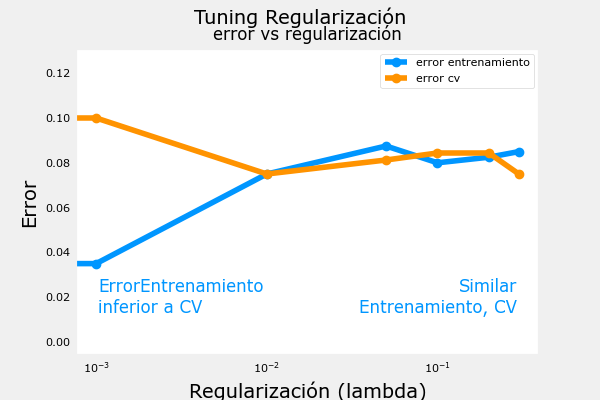

In [15]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

In [ ]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)